In [44]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
# Set up file directory
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'NYSERDA_Data')
print(f'Data directory: {data_dir}')
vehicle_dis = pd.read_csv(os.path.join(data_dir,'Vehicle Description.csv'))

Data directory: c:\Cornell\Research\EVI-Pro-Lite\NYSERDA_Data


In [13]:
print(vehicle_dis.columns)
# GVWR is the Gross vehicle weight rating, 

Index(['Year', 'GVWR', 'NHTSA_Make_Name', 'NHTSA_Model_Name',
       'Drivetrain_Type', 'Vehicle_Class', 'Average_MSRP', 'Min_MSRP',
       'Max_MSRP', 'Average_Electric_Range', 'Min_Electric_Range',
       'Max_Electric_Range', 'Average_City_MPG', 'Max_City_MPG',
       'Min_City_MPG', 'Average_Highway_MPG', 'Min_Highway_MPG',
       'Max_Highway_MPG', 'Average_Highway_MPGe', 'Average_City_MPGe',
       'Min_City_MPGe', 'Max_City_MPGe', 'Min_Highway_MPGe',
       'Max_Highway_MPGe', 'Average_Level_2_Charge_Time_Hours',
       'Min_Level_2_Charge_Time_Hours', 'Max_Level_2_Charge_Time_Hours',
       'Vehicle_Index', 'EV_Atlas_Vehicle_Name', 'Vehicle_GVWR_Class',
       'Vehicle_Category', 'VIN_Key'],
      dtype='object')


In [16]:
vehicle_class = vehicle_dis['Vehicle_Class'].unique()
print(vehicle_class)

['Unknown' 'Trailer' 'Midsize Cars' 'Fire Apparatus' 'Compact Cars'
 'Truck - General' 'Incomplete Vehicle' 'Midsize Station Wagons'
 'Standard Pickup Trucks' 'Tractor Truck' 'Off Road Vehicle' 'Bus' 'Van'
 'Minivan' 'Step-Van' 'Motor Home' 'School & Shuttle Bus'
 'Vans, Cargo Type' 'Small Sport Utility Vehicle' 'Motorcycle' 'Motorhome'
 'Transit Bus' 'Standard Sport Utility Vehicle' 'Streetcar' 'PnD Class 4'
 'Subcompact Cars' 'Small Station Wagons' 'Large Cars' 'Two Seaters'
 'Vans, Passenger Type' 'Minicompact Cars' 'Small Pickup Trucks'
 'Tractor Class 8' 'Vocational Class 8' 'PnD Class 6']


In [20]:
Drivetrain_Type = vehicle_dis['Drivetrain_Type'].unique()
print(Drivetrain_Type)

['ICE' 'BEV' 'PHEV' 'UNKNOWN' 'FCV']


In [28]:
# Not sure if the data set gives vehicle of the entire USA or just in NY, needs filter
# The only similar column is vehicle index, merge two data sets
current_registrations = pd.read_csv(os.path.join(data_dir, 'Current Registrations.csv'))
merged_vehicle = pd.merge(vehicle_dis, current_registrations, on='Vehicle_Index')
print(merged_vehicle.columns)
#print(current_registrations.columns)
merged_vehicle.head()

Index(['Year', 'GVWR', 'NHTSA_Make_Name', 'NHTSA_Model_Name',
       'Drivetrain_Type', 'Vehicle_Class', 'Average_MSRP', 'Min_MSRP',
       'Max_MSRP', 'Average_Electric_Range', 'Min_Electric_Range',
       'Max_Electric_Range', 'Average_City_MPG', 'Max_City_MPG',
       'Min_City_MPG', 'Average_Highway_MPG', 'Min_Highway_MPG',
       'Max_Highway_MPG', 'Average_Highway_MPGe', 'Average_City_MPGe',
       'Min_City_MPGe', 'Max_City_MPGe', 'Min_Highway_MPGe',
       'Max_Highway_MPGe', 'Average_Level_2_Charge_Time_Hours',
       'Min_Level_2_Charge_Time_Hours', 'Max_Level_2_Charge_Time_Hours',
       'Vehicle_Index', 'EV_Atlas_Vehicle_Name', 'Vehicle_GVWR_Class',
       'Vehicle_Category', 'VIN_Key', 'Vehicle Count', 'ZIP Code',
       'RegistrationMonth', 'DMV_ID', 'Registration_Valid_Date',
       'County_GEOID'],
      dtype='object')


,Year,GVWR,NHTSA_Make_Name,NHTSA_Model_Name,Drivetrain_Type,Vehicle_Class,Average_MSRP,Min_MSRP,Max_MSRP,Average_Electric_Range,...,EV_Atlas_Vehicle_Name,Vehicle_GVWR_Class,Vehicle_Category,VIN_Key,Vehicle Count,ZIP Code,RegistrationMonth,DMV_ID,Registration_Valid_Date,County_GEOID
0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1CMTS412C,1,10465,3/1/2021,73,00:00.0,NaN
1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,124378N43,1,11777,6/1/2022,73,00:00.0,NaN
2,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,124378N43,1,14612,5/1/2022,73,00:00.0,NaN
3,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,124378N43,1,11763,5/1/2022,73,00:00.0,NaN
4,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ICE,Unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4PL500E1X,1,13815,10/1/2014,73,00:00.0,NaN


In [34]:
merged_vehicle = merged_vehicle[merged_vehicle['ZIP Code'] != 'Error']
NYzipcode_df = pd.read_csv(os.path.join(data_dir, 'nys_zipcode.csv'))

# Filter for NYS Zip codes
merged_vehicle['ZIP Code'] = merged_vehicle['ZIP Code'].astype(int)  # Changing object or strings into interger
merged_vehicle = merged_vehicle[merged_vehicle['ZIP Code'].isin(NYzipcode_df['ZIP Code'])]
merged_vehicle = merged_vehicle[merged_vehicle['Vehicle_Class'] != 'Unknown']

In [42]:
# merged_vehicle.head()
# From above vehicle type reading, for residental use, assume the following classes:
# Midsize Cars, Compact Cars, Midsize Station Wagons, Standard Pickup Trucks, Van, Minivan, Small Sport Utility Vehicle
# Standard Sport Utility Vehicle, Subcompact Cars, Small Station Wagons, Large Cars, Two Seaters, Minicompact Cars
# Small Pickup Trucks
# All types above are residental vehicles. 
residental_vehicle = ['Midsize Cars', 'Compact Cars', 'Midsize Station Wagons', 'Standard Pickup Trucks', 'Van', 'Minivan', 'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle', 'Subcompact Cars', 'Small Station Wagons', 'Large Cars', 'Two Seaters', 'Minicompact Cars', 'Small Pickup Trucks']
home_use_all = merged_vehicle[(merged_vehicle['Vehicle_Class'].isin(residental_vehicle))]
selected_columns = ['Year','Drivetrain_Type','Vehicle_Class','VIN_Key','ZIP Code','RegistrationMonth','DMV_ID']
home_use_selected = home_use_all[selected_columns]
home_use_selected.head()

,Year,Drivetrain_Type,Vehicle_Class,VIN_Key,ZIP Code,RegistrationMonth,DMV_ID
1781,2021,ICE,Compact Cars,SBM14RCAM,10504,2/1/2023,73
1782,1995,ICE,Compact Cars,WP0AA296S,12061,4/1/2022,73
1783,1995,ICE,Compact Cars,WP0AA296S,10024,10/1/2021,73
1784,2015,ICE,Compact Cars,WAULGBFRF,14227,7/1/2022,73
1785,1989,ICE,Compact Cars,ZA9CA05AK,12188,4/1/2022,73


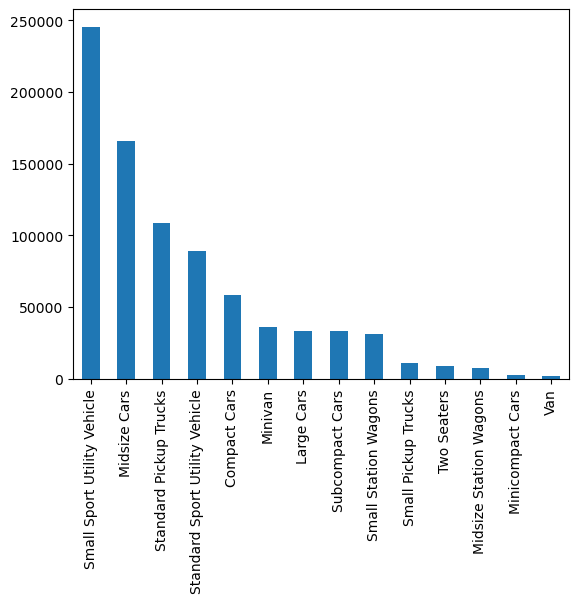

Small Sport Utility Vehicle       245433
Midsize Cars                      165541
Standard Pickup Trucks            108803
Standard Sport Utility Vehicle     89012
Compact Cars                       58672
Minivan                            35680
Large Cars                         33316
Subcompact Cars                    33298
Small Station Wagons               30955
Small Pickup Trucks                10684
Two Seaters                         8856
Midsize Station Wagons              7420
Minicompact Cars                    2385
Van                                 1947
Name: Vehicle_Class, dtype: int64


In [54]:
vehicle_counts = home_use_selected['Vehicle_Class'].value_counts()
vehicle_counts.plot(kind = 'bar')
plt.show()
print(vehicle_counts)

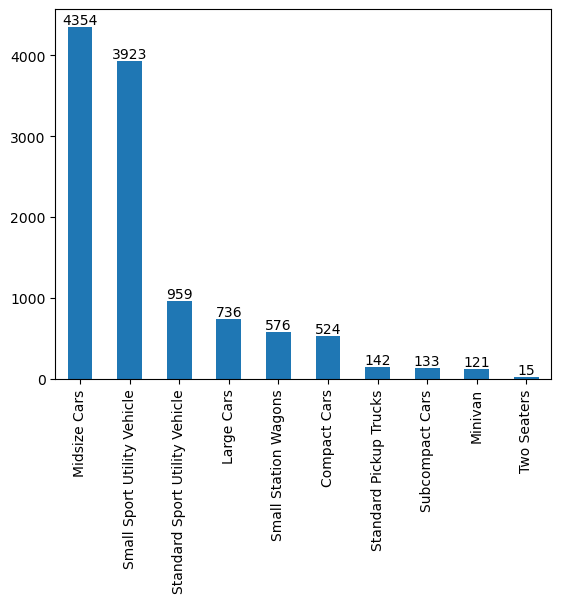

In [55]:
electric_vehicle = ['BEV','PHEV']
home_electric = home_use_selected[(home_use_selected['Drivetrain_Type'].isin(electric_vehicle))]
home_electric_counts = home_electric['Vehicle_Class'].value_counts()
home_electric_counts.plot(kind = 'bar')
for i, v in enumerate(home_electric_counts):
    plt.text(i,v, str(v), ha = 'center', va = 'bottom')
plt.show()